<h1 style="text-align:center"> Comprehend Sentiments in Product Reviews <br> (Natural Language Processing with Deep Learning) </h1>

<center>Candidate Number: 23267 <br> Supervisor: Professor Milan Vojnovic</center>

<center><font size = "4">Abstract</font></center>

In this paper, I investigate text classification using Natural Language Processing (NLP) techniques and Neural Networks - Recurrent Neural Network (RNN) and Long Short Term Memory (LSTM)  to predict the appropriate sentiment label for each review. The input of the deep learning system will be product reviews comprised of product ratings and text descriptions of the reviews. 
 
Predicting the sentiment label of a written review is an essential and challenging task. Reviews support sellers in receiving feedback from their customers. Knowing the sentiment of a review, sellers can gain insights into their products and services, adding significant commercial value to businesses.

##  1 Introduction
During the current pandemic, consumers have preferred online shopping due to social distancing and lockdown. Customer reviews are an essential factor that helps consumers judge the actual quality of products or services without physically inspecting the product. Although the sentiment of written reviews varies greatly, positive reviews will garner many votes from buyers over time. Furthermore, reviews assist vendors in receiving feedback from their customers. By understanding the sentiment of a review, sellers can gain insights into their products and services, adding significant commercial value to businesses. Thus, I chose Natural Language Processing (NLP) with Deep Learning to analyze sentiments of product reviews, which can support product sellers and consumers to take a focused approach on the reviews that matter to them.

### 1.1 Problem Statement
Because of the scarcity of labelled data, predicting the sentiment of a review is particularly difficult. Furthermore, the so-called "obvious features" - Score, which explicitly shows the sentiment of a text, are not always consistent with others since the scoring mechanism ranges between customers. 
 
The inherent difficulty of sentiment prediction is clearly demonstrated in the two example reviews listed below. Both reviews award "3" ratings despite the fact that they share distinct sentiments and linguistic structures.




     "My foie gras arrived quickly and fully frozen. I was able to easily separate it into two pieces to save one lobe for later. There was only the one connecting vein in the middle so prep was minimal."
    
     - “score”: 3; "Summary": Good Product
 



     "This egg pasta ingredient was "powdered egg product" and as such not as tasty as those containing the real thing. i don't like anything powdered, but price was RIGHT. can't have it all i guess."
    
     - “score”: 3; "Summary": Awful taste



### 1.2 Methodology

As an initial step, I construct a Logistic Regression model to obtain a baseline level of performance. I then trained a Recurrent Neural Network (RNN) on a dataset containing thousands of unstructured text reviews. Following that, I developed the Long Short Term Memory Neural Network (LSTM) model. And lastly, set performance metrics in evaluating and comparing different solutions.
 
Neural Network Models facilitate the learning of long-term dependencies needed for problems such as sentimental analysis. Python will be used to pre-process the data and tokenized text comments (i.e. convert text to integer). In addition, TensorFlow will be used to generate embedding of the tokenized text and develop deep learning models.  

## 2 Data

### 2.1 Choice of Data

Product ratings and textual descriptions are significant elements of product reviews. The dataset used in this experiment was the 'Amazon Fine Food Reviews' corpus, which comprises approximately 560K+ reviews posted by 256K separate people. ProductId, UserId, ProfileName, Helpfulness Numerator, Helpfulness Denominator, Score, Time, Summary, and Text are among the vectors used. 
 
Aside from that, I did some regular pre-processing for the feedback. All reviews have been translated to lower case, and all trailing spaces and punctuation have been deleted. Furthermore, the terms of each review have been tokenized or transformed into an integer value, producing a list of tokens (integers) for each review.



## Construct raw dataset Using Google Devices:

In [10]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

Mounted at /content/drive


['Colab Notebooks',
 'The Wealthfront Generation redux.pdf',
 'message_zdm.html',
 'Reviews2.csv']

In [11]:
df = pd.read_csv('Reviews2.csv')
# df.head(2)

## Import important packages

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import os
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, BatchNormalization, Dropout
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler, SMOTE
from itertools import chain
import nltk
nltk.download('punkt')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 2.2 Structure of data

### 2.2.1 Numerical features of the dataset 

| Feature name | Feature description | Min.value | Max.value | SD |
| :-----| ----: | :----: | :----: | :----: |
| Helpfulness Numerator | Number of users who found the review helpful | 0 | 866 | 7.64 |
| Helpfulness Denominator | Number of users who indicate whether they found the review helpful or not | 0 | 923 | 8.29 | 
| Score | Rating between 1 and 5 | 0 | 1 | 5 | 
| Time | timestamp for the review | 939m | 1.3b | 48m | 



The chart above provides statistical analysis and summary of all of the numerical features in the dataset, while the chart below describes all of the other non-numerical features in the dataset.

### 2.2.2 Non-Numerical features of the dataset 

| Feature name | Feature description |
| :-----| :-----|
| Product Id | Identifier for the product |
| User ID | Identifier for the user |
| Profile Name | Profile Name of the user |
| Summary | Summary of the review |
| Text | Full discription of the reviwe weitten by costomers|



### 2.3 Data balancing

The distribution of reviews is skewed. I n order to reduce the difficulty of the neural network implementation, I utilise the data points in the training set where Revenue = 1 are over-sampled using the SMOTE function from the Imbalanced-Learn python library to match the number of data points where sentiment = 0.  This increases the cumulative number of data points from 390K to 668K. The latest dataset containing 334K data samples with Sentiment class 1 and 334K data samples with Sentiment class 0.  I made sure the class labels of the total number of the positive and negative targets are balanced.

## 3 Methodogy and Models

### 3.1 Feature pipeline

I use the review text as the primary feature source without providing the models with any additional meta-information about the review or the enterprise. The data obtained lacked a "Sentiment" feature, which is critical for model training. As a result, using a Lambda algorithm, a Sentiment feature was engineered from the Score feature. The lambda function is applied to each row in the Score feature so that any review with a score of 2 or lower is assigned a negative Sentiment class label of '0.'  Review's score more or equal 3 assigned a positive Sentiment label of '1.' As a result, the Sentiment function designed and selected as target variables. Now that the Target function has been created, the Score feature is no longer used, and instead, the Text and Sentiment functions are used as input and output variables. 

I did little pre-processing on the review text. Some salient points about the review pre-processing pipeline include : 
  - No lower-casing is performed. The effect of lower-casing was studied for the baseline model and was seen not to produce any tangible improvements. 
  - No stemming or lemmatization is performed. These operations were analyzed in the baseline model producing minimal to no differences in the model performance. 
  - Stop words and punctuations except for the question mark and exclamation point are removed. 

**Expected Outcome Example:**


**Input:**

| ID | Review Text Description |
| :----: | :-----|
| 0 | If Keurig brewers were evaluated by this particular K-Cup...... |
| 1 | He brings me his Kong whenever I'm in the kitchen, without...... |
| 2 | I was really disappointed in these olives. The are very mushy...... |
| ... | ... |

POSITIVE	He brings me his Kong whenever I'm in the kitchen, without me having to ask him anymore. I...
POSITIVE	I bought these on super sale because I needed them for a pie crust and they were cheap.  I...
NEGATIVE	 I was really disappointed in these olives. The are very mushy and I prefer a more firm tex...

**Output:**

| ID | Sentiment |
| :----: | :-----|
| 0 | 0 |
| 1 | 1 |
| 2 | 0 |
| ... | ... |

### 3.2 Model Development



#### 3.2.1 Base line: Logistics regression

To set the base for the whole modelling implementation, a baseline standard of output must be established to determine if there is a progression in the prediction capacity of each subsequent model. In this paper, I developed a baseline model - Logistic Regression, which was trained on unigram and bigram bag-of-words review text features. 
 
 
 
#### 3.2.2 Neural Network Models:

Two neural networks were used, and they are: 

**1. Recurrent Neural Networks (RNN)**

A recurrent neural network (RNN) would be used to predict text classification. The majority of sentiment analysis approaches examine each term explicitly, attribute positive points for glowing manner and negative points for negative words, and then totalling the points. This is the lexicon process. However, the drawback of this approach is that it disregards the word order, resulting in the lack of essential information. Since it does not take the text at face value, the RNN method may consider subtleties. It develops symbolic representations of what it has discovered. 
 
I trained an RNN, which is a generalization of feed-forward neural networks required to facilitate sequential data. In a typical neural network, all input and output weights are independent of one another, and any data input has the same operation performed on it repeatedly. The output of the current input is based on the one from the previous computation. RNN will gather details about what has been determined so far for each variable in a series, and this information is saved because RNNs have a sense of memory. I collect RNN output to create the final prediction. To make the final prediction, the RNN model must spread dependencies over long distances.



**2. Long Short Term Memory (LSTM) Neural Networks**

Long Short Term Memory (LSTM) is known to control information flow using a system known as gates. LSTMs are essentially an improved variant of RNNs since they are designed to recall past data in the secret state even more efficiently, thus eliminating the disappearing gradient issue of RNNs. Backward induction is used to train LSTMs. 

  - Input gate: determines what importance of input can be used to change the memory. 
  - Forget gate: determines what data are to be omitted from the block's memory. 
  - Output gate: computes the output value depending on the input value and the block's memory.

<p align="center">
<img src="picture/picture1.png" width="550" height="175" />
</p>

The main advantage of LSTM is that it can memorize information. When there's too large of a gap between two pieces of information, RNN cannot learn to connect information. 


**Text Tokenization**

The data in the Text feature was then tokenized into a numerical vector of numbers describing the texts in each row of data. This was accomplished in two stages: The texts from each row in the DataFrame were extracted and appended to a list, and then the Natural Language Tool Kit (NLTK) Tokenizer function was fitted on this list of texts to produce a sequence list for each row, which was then translated to an array. 

<p align="center">
<img src="picture/picture2.png" width="400" height="200" />
</p>

**Embedding**

Firstly, l use an embedding layer to represent words as vectors. This representation is more efficient than one-hot encoding. Then use the word2vec method to produce these embedding, which is built on the hypothesis that related terms occur in similar contexts and that words with parallel definitions will be identical to each other.

<p align="center">
<img src="picture/picture3.png" width="550" height="175" />
</p>



**Long Short Term Memory**

The embedded words were further transfer to the LSTM cells. There are interactions between the first, second, and third LSTM cells used in the graph. Unlike most other models that presume that all inputs are independent of one another, these relations enable us to convey information stored in the word series. The power of the LSTM cell to incorporate or subtract information from the cell state is one of its strengths. 

**Output: positive or negative?**

Finally, I can use the sigmoid function to predict whether the review is optimistic or ominous. The function has the benefit of being bound between 0 and 1 and can be viewed as a likelihood of performance. E.g., I may predict the likelihood that a review would be favourable. I have a performance at each stage. And it is critical to provide a final performance that forecasts the mood at the ending of the sentence.

<p align="center">
<img src="picture/picture4.jpg" width="400" height="125" />
</p>

<center>Sentiment Analysis Model</center>

## 4 Implementation 

Coding of this part please check [Code_Part_B.ipynb] https://github.com/lse-st449/project-2021-lllllxnnnnn/blob/main/23267_ST449_Final_Project.ipynb/Code/Code_Part_B.ipynb

### 4.1 Feature Engineering

The bulk of scores were about 4 and 5, with a mean value of 4.18. I can render a binary prediction since the distribution is heavily biased to the left. A negative review would have a score between 1 and 3, whereas a positive review had a score between 4 and 5. After adding a new component called sentiment, which will be set to NEGATIVE when the Score is between 1 and 3, and POSITIVE when the Score is 4 or 5, I obtain the following new distribution: 

    POSITIVE    This brand of coffee has been available in my local stores for some time -- I've believe the company is local. I've been drinking it for quite some time and have not tired of it.  I'm particularly fond of the Turtle Sundae but all the flavors are good.  I can't say that I've had a bad one. As it turns out, it's less expensive to order it from Amazon and have it show up at my front door than it is for me to run out to the local Walmart to get it. It's a no brainer. Try it, if you like rich, flavored coffee, you'll like it.
    
    NEGATIVE     I have purchased numerous canned chicken products before, and of course none compare to real chicken. However, that being said, this product's quality is considerably below that of most canned chickens.  Other canned chickens have large chunks of white meat, while this product is full of small discolored pieces with pieces of what appear to be skin or fat. Considering the price is also higher than the store bought competitors, I can not recommend this product.
    
    POSITIVE     This coffee is better than McDonalds, StarBucks, Atlanta Bread, Folgers, Maxwell House and...
    
    NEGATIVE     I dont like the taste of this at all.  I have some other fennel tea from another company n...
    
    POSITIVE     I love all of Newman's Own products, and I like that their dog treats are all-natural and ...
    
    NEGATIVE     I was really disappointed in these olives. The are very mushy and I prefer a more firm tex...
    
    



The input variable is an unstructured text. By looking characters of the review sentence, I can quickly have an idea of whether the review is positive or negative. For the negative reviews, I have negative expressions such as **"below of most"**, or **"don't like"**, These negative expressions can also be more nuanced depending on the context, such as **"really disappointed."** For positive reviews, users use positive expression such as **"better than McDonalds"**, **"love all of them"**, **"belive xxx is local"**, **"all flavors are good",** **"like it," etc**.
 
 

The data was fed into the models after it had been effectively pre-processed and tokenized. But first, two critical measures were accomplished: 


#### 4.1.1 Data splitting 

Using the Train-Test-Split feature, the data is divided into 70% train data and 30% test data. Therefore, the target feature's stratifying parameter is adjusted to ensure that the amount of data points from each class in the target feature is proportionally divided between the train and test sets. 70% of the data was used for training to maximize the prediction accuracy of the models, especially on data points with a class Sentiment value of 0 because the data is imbalanced, with more data points with a Sentiment class label of 1. 
 

#### 4.1.2 Data balancing 
To solve the problem of data skewed, the data points in the training set with Revenue = 1 are over-sampled using the SMOTE algorithm from the Imbalanced-Learn python library to align the number of data points with Sentiment = 0. This includes the overall amount of data points from 390K to 668K. The latest dataset includes 334K data samples with Sentiment class of 1 and 334K data samples with Sentiment class of 0, balancing the total number of positive and negative target class labels.

### 4.2 Neural network model

  1. The specification of the first Neural network model, model **RNN**, is as follows: 



        
 - Layer 1: The first layer is an Embedding layer (typically used for text data) that is initialized with the entire duration of the input data columns (100) and its vocabulary number (1000). It is then accompanied by a Dropout feature, which removes 30% of the data entering the next layer at random. This is achieved to reduce the overfitting of the neural network model as a whole. Finally, the data is normalized when it exits the embedding layer using a BatchNormalization algorithm. 




 - Layer 2: The RNN is located in the second layer and is configured to accept and process the 32 outputs from the Embedding layer. A Dropout feature and a BatchNormalization function are often used here. 




  - Layer 3: The final layer is the dense layer that produces the final output/prediction. It is set up to emit a single value and is equipped with a sigmoid feature to reduce the binary list of possibilities to 1. The model is then built using RMSprop as the gradient optimization strategy and Binary Cross-Entropy as the loss function. 




  2. The second model - **LSTM**
    - It is based on the same architecture as the first, except that in the second layer, the RNN network is replaced with an LSTM network.

## 5 Experiments 
### 5.1 Performance Metrics

$$
Performance\ Metrics
\begin{cases}
\ 1. Accuracy, &{Sum\ of\ correct\ predictions \over Sum\ of\ Predictions}\\
\\
\\
\ 2. Precision,  &{True\ positive\over True\ positive\ +\ False\ Positive}\\
\\
\\
\ 3. Recall,  &{True\ positive\over True\ positive\ +\ False\ Negative}\\
\\
\\
\ 4. Support,  &The\ number\ of\ data\ samples\ used\ from\ each\ class \\
\\
\\
\ 5. F1-score,  &The\ ratio\ of\ the\ product\ of\ Precision\ and\ Recall\ to\ their\ sum\ multiplied\ by\ two
\end{cases}
$$




In [16]:
# importing the amazon reviews datafile and selecting the needed columns
df = pd.read_csv("Reviews2.csv")
df = df[['Score','Summary', 'Text']]

# Engineering the sentiment feature from the score column
df['Sentiment'] = df["Score"].apply(lambda x: 1 if x > 2 else 0)
df_mod = df[['Text', 'Sentiment']].copy()
df_mod.head(3)

,Text,Sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1


In [17]:
# defining a function to carry out exploratory data analysis on the null and missing values in the data
def info(data_fr):
    for col in data_fr.columns:
       # print(col ,': ',data_fr[col].value_counts())
        print(col ,'total values: ',len(data_fr[col]))
        print(col ,'null values: ',data_fr[col].isna().sum())
        print(col ,'non-null values: ',data_fr[col].notnull().sum())
        print('is unique: ', data_fr[col].nunique()/len(data_fr[col]))
        print(col ,'duplicate values: ', (len(data_fr[col]) - data_fr[col].nunique()))
        print('\n')

In [18]:
info(df)

Score total values:  568454
Score null values:  0
Score non-null values:  568454
is unique:  8.795786466451111e-06
Score duplicate values:  568449


Summary total values:  568454
Summary null values:  27
Summary non-null values:  568427
is unique:  0.5202566962322369
Summary duplicate values:  272712


Text total values:  568454
Text null values:  0
Text non-null values:  568454
is unique:  0.6923673683358724
Text duplicate values:  174875


Sentiment total values:  568454
Sentiment null values:  0
Sentiment non-null values:  568454
is unique:  3.5183145865804446e-06
Sentiment duplicate values:  568452




In [19]:
#dropping the summary columnn to allow us focus on just the text feature we would be working with
df.dropna(subset = ['Summary'], inplace = True)
info(df_mod)

Text total values:  568454
Text null values:  0
Text non-null values:  568454
is unique:  0.6923673683358724
Text duplicate values:  174875


Sentiment total values:  568454
Sentiment null values:  0
Sentiment non-null values:  568454
is unique:  3.5183145865804446e-06
Sentiment duplicate values:  568452




In [20]:
# shuffling up the dataset to improve diversity of the datafile before splitting
from sklearn.utils import shuffle
df_mod = shuffle(df_mod)

In [21]:
# checking the different number of rows for each label in out target feature
df_mod.Sentiment.value_counts()

1    486417
0     82037
Name: Sentiment, dtype: int64

In [22]:
# creating a list to contain all the texts from our dataframe in preparation for tokenization of the words
lines =[] 
  
# Iterate over each row 
for index, rows in df_mod.iterrows(): 
    # Create list for the current row 
    my_list =str(rows.Text)
      
    # append the list to the final list 
    lines.append(my_list) 
  
# Print the list 
len(lines)

568454

In [23]:
label=list(df_mod['Sentiment'])

In [24]:
# tokenizing the words in the lines list so as to allow the data be usable my our neural network models
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [25]:
sequences = np.array(sequences)
label = np.array(label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


## Modeling

In [28]:
# maually splitting the data into test and train test using a rough 70/30 distribution
x_train=sequences[:390000]
y_train=label[:390000]
x_test=sequences[390000:]
y_test=label[390000:]

In [29]:
# importing keras to preprocess our train and test data by padding them with zero values so each sub-list in them
# contains the same number of elements
maxlen = 100
from keras import preprocessing
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [30]:
#using smote to address data imbalance
smote = SMOTE(random_state=1, k_neighbors=6)

x_train_smote, y_smote = smote.fit_resample(x_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
y_df = pd.DataFrame(y_train, columns= ["Sentiment"])
print(y_df["Sentiment"].value_counts())

1    333793
0     56207
Name: Sentiment, dtype: int64


In [32]:
y_sdf = pd.DataFrame(y_smote, columns= ["Sentiment"])
print(y_sdf["Sentiment"].value_counts())

1    333793
0    333793
Name: Sentiment, dtype: int64


   Y train  Y smote
0   333881   333881
1    56119   333881


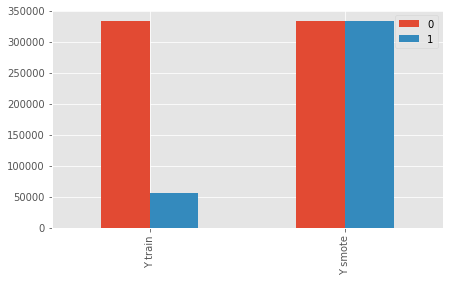

In [52]:
# Creating bargraph to show class distribution of data before and after smote oversampling
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
y_dict = {'Y train': [333881, 56119], 'Y smote': [333881, 333881]}

y_comb = pd.DataFrame(data=y_dict)

print(y_comb)

# plotting the rss values of each feature on the train and test data side by side as a multiple bargraph
style.use('ggplot')
y_comb.T.plot(kind='bar',figsize=(7,4))

## Baseline model - Logistic Regression

In [34]:
## Baseline model - Logistic Regression
# using the logistic regression model to establish a baseline performance our models should surpass
lr_model = LogisticRegression()
lr_model.fit(x_train_smote, y_smote)

# printing out its performance
y_pred_lr = lr_model.predict(x_test)
print (accuracy_score(y_test, y_pred_lr))
print(metrics.classification_report(y_test, y_pred_lr))

0.48825467627511854
              precision    recall  f1-score   support

           0       0.14      0.51      0.22     25830
           1       0.85      0.48      0.62    152624

    accuracy                           0.49    178454
   macro avg       0.50      0.50      0.42    178454
weighted avg       0.75      0.49      0.56    178454



## RNN

In [35]:
# building a simple RNN model with a single dense sigmoid layer to fit our binary class data
from keras.layers import Embedding,SimpleRNN
from keras.layers import Flatten, Dense
from keras.layers import Embedding,SimpleRNN

input_shape = [x_train_smote.shape[1]]

model_rnn = Sequential()
model_rnn.add(Embedding(1000, 32, input_length=maxlen))
model_rnn.add(Dropout(rate=0.3))
model_rnn.add(BatchNormalization())
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dropout(rate=0.3))
model_rnn.add(BatchNormalization())
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_rnn.summary()
history_rnn = model_rnn.fit(x_train_smote, y_smote, epochs=8, batch_size=256, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           32000     
_________________________________________________________________
dropout (Dropout)            (None, 100, 32)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 32)           128       
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [36]:
# predict crisp classes for test set
rnn_y_classes = model_rnn.predict_classes(x_test, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# obtain performance of RNN model
print(metrics.classification_report(y_test, rnn_y_classes))

In [38]:
# obtain performance of RNN model
print(metrics.classification_report(y_test, rnn_y_classes))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70     25830
           1       0.95      0.95      0.95    152624

    accuracy                           0.91    178454
   macro avg       0.82      0.82      0.82    178454
weighted avg       0.91      0.91      0.91    178454



LSTM

In [39]:
# building a LSTM model with a single dense sigmoid layer to fit our binary class data
model_lstm = Sequential()
model_lstm.add(Embedding(1000, 32, input_length=maxlen))
model_lstm.add(Dropout(rate=0.3))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(rate=0.3))
model_lstm.add(BatchNormalization())
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_lstm.summary()
history_lstm = model_lstm.fit(x_train_smote, y_smote, epochs=8, batch_size=256, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           32000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 32)           128       
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [ ]:
# predict crisp classes for test set
lstm_y_classes = model_lstm.predict_classes(x_test, verbose=0)

In [ ]:
# obtain performance of LSTM model
print(metrics.classification_report(y_test, lstm_y_classes))

In [ ]:
# obtain performance of LSTM model
print(metrics.classification_report(y_test, lstm_y_classes))

### 5.2 Model Performance
Many emphases would be placed on F1-scores because F1-score is the parameter that shows how well our precision and recall scores balance each other. Below is the performance of the models on the test data 


I evaluated the performance, and the findings are depicted in the diagrams above. The experimental results show that 1)The performance of the RNN and LSTM models outperforms the existing Logistic Regression, indicating the effectiveness of this experiment. 2)The RNN model achieved above-average performance in negative label prediction.  3) This finding supports the hypothesis that the LSTM model, as expected, outperforms RNN in terms of overall accuracy, as measured by its average precision, recall, and F1 performance. The graph below depicts the outcomes of each executing model variance.

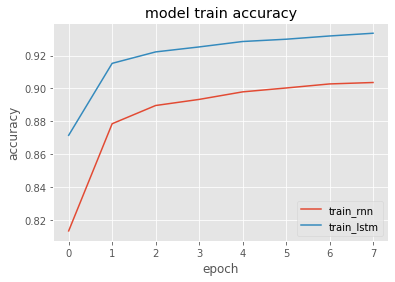

In [47]:
plt.plot(history_rnn.history['acc'])
plt.plot(history_lstm.history['acc'])
plt.title('model train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_rnn', 'train_lstm'], loc='lower right')
plt.show()

In [ ]:
plt.plot(history_rnn.history['val_acc'])
plt.plot(history_lstm.history['val_acc'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val_rnn', 'val_lstm'], loc='lower right')
plt.show()

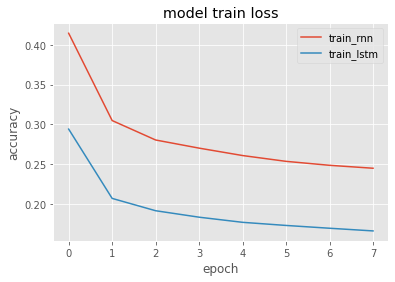

In [48]:
plt.plot(history_rnn.history['loss'])
plt.plot(history_lstm.history['loss'])
plt.title('model train loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_rnn', 'train_lstm'], loc='upper right')
plt.show()

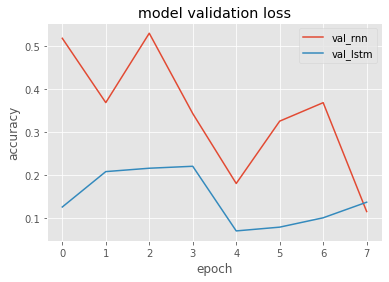

In [49]:
plt.plot(history_rnn.history['val_loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val_rnn', 'val_lstm'], loc='upper right')
plt.show()

## 6 Conclusion and Future Work

### 6.1 Summary

In this paper, I implemented different neural models for sentiment prediction for reviews. This research demonstrated that neural networks could be effectively used to solve NLP binary classification deep learning problems. Because of its much superior memory short term memory device. LSTM was able to capture the information in the review text much better than the RNN model as it could get even higher accuracy and F1 scores due to its far superior memory short-term memory system.  


### 6.2 Future Work

The scope of this work was specific to the use of RNNs and LSTM neural networks to solve text classification problems. RNN models such as bidirectional RNN, multi-stack RNN, and RNN with residual connections can be applied to discover diverse neural network models with varying degrees of accuracy and performance on sentiment prediction. 
 
In the future, I would like to extend the model to obtain insights into the effects of multiple hyper-parameters on model performance by experimenting different combinations of hyper-parameter value combinations. A further direction could be interesting to investigate the combination of CNN and RNNs to optimize the model's performance. 




### Reference

[1] J. Blitzer, M. Dredze, F. Pereira, "Biographies, Bollywood, Boom-boxes and Blenders: Domain Adaptation for Sentiment Classification." Association of Computational Linguistics (ACL), 2007

[2] Predicting Amazon product reviews’ ratings https://towardsdatascience.com/predicting-sentiment-of-amazon-product-reviews-6370f466fa73

[3] S. Hochreiter, and J. Schmidhuber. "LONG SHORT-TERM MEMORY." Neural ComputationNovember 1997

[4] - Yoon Kim. 2014. Convolutional neural networks for sentence classification. In Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP). Association for Computational Linguistics, pages 1746–1751.

[5] - Aditya Joshi, Vaibhav Tripathi, Kevin Patel, Pushpak Bhattacharyya, and Mark Carman. 2016. Are word embedding-based features useful for sarcasm detection? In Proceedings of the 2016 Conference on Empirical Methods in Natural Language Processing. Association for Computational Linguistics, pages 1006–1011.

[6] T. Young, D. Hazarika, S. Poria and E. Cambria, "Recent Trends in Deep Learning Based Natural Language Processing [Review Article]," in IEEE Computational Intelligence Magazine, vol. 13, no. 3, pp. 55-75, Aug. 2018, doi: 10.1109/MCI.2018.2840738.

[7] Y. Wang, M. Huang, X. Zhu, and L. Zhao, “Attention-based LSTM for aspect-level sentiment classification,” in Proc. Conf. Empirical Methods Natural Language Processing, 2016, pp. 606–615.

[8] Y. Ma, H. Peng, and E. Cambria, “Targeted aspectbased sentiment analysis via embedding commonsense knowledge into an attentive LSTM,” in Proc. Association Advancement Artificial Intelligence Conf., 2018, pp. 5876–5883.

[9] D.S. Sachan, M. Zaheer, R. Salakhutdinov, "Revisiting LSTM Networks for Semi-Supervised Text Classifi- cation via Mixed Objective Function", arXiv: 2009.04007

[10] https://www.udacity.com/course/deep-learning-nanodegree-foundation--nd101

[11] https://www.tensorflow.org/tutorials/word2vec